# 남이 만든 모델 (학습된 모델)

In [1]:
from tensorflow.keras.applications import VGG16

### keras에 내장된 pre-trained 모델
- Xception
- VGG16
- VGG19
- ResNet, ResNetV2
- InceptionV3
- InceptionResNetV2
- MobileNet
- MobileNetV2
- DenseNet
- NASNet

# pre-trained 모델 가져오기

In [2]:
vgg = VGG16(include_top=False, weights ='imagenet')
vgg.summary()

# included_top=False: fully connected layer를 제외함.
# fully connected layer란, 마지막의 dense layer를 의미함.

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, None, None, 3)]   0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, None, None, 128)   0     

### layer 및 weights 추출하기

- 특정 레이어를 뽑아낼 수 있다.
- 각 레이어마다 바이어스와 필터들이 있다. 

- get_layer해서 뽑애낼 수 있고, get_weights()를 가져올 수 있다.

In [9]:
block1_conv1 = vgg.get_layer('block1_conv1')
block1_conv1

In [10]:
block1_conv1.get_weights()

[array([[[[ 4.29470569e-01,  1.17273867e-01,  3.40129584e-02, ...,
           -1.32241577e-01, -5.33475243e-02,  7.57738389e-03],
          [ 5.50379455e-01,  2.08774377e-02,  9.88311544e-02, ...,
           -8.48205537e-02, -5.11389151e-02,  3.74943428e-02],
          [ 4.80015397e-01, -1.72696680e-01,  3.75577137e-02, ...,
           -1.27135560e-01, -5.02991639e-02,  3.48965675e-02]],
 
         [[ 3.73466998e-01,  1.62062630e-01,  1.70863140e-03, ...,
           -1.48207128e-01, -2.35300660e-01, -6.30356818e-02],
          [ 4.40074533e-01,  4.73412387e-02,  5.13819456e-02, ...,
           -9.88498852e-02, -2.96195745e-01, -7.04357103e-02],
          [ 4.08547401e-01, -1.70375049e-01, -4.96297423e-03, ...,
           -1.22360572e-01, -2.76450396e-01, -3.90796512e-02]],
 
         [[-6.13601133e-02,  1.35693997e-01, -1.15694344e-01, ...,
           -1.40158370e-01, -3.77666801e-01, -3.00509870e-01],
          [-8.13870355e-02,  4.18543853e-02, -1.01763301e-01, ...,
           -9.431

In [3]:
# filter weight, bias weight
len(block1_conv1.get_weights())

2

In [4]:
filters, bias = block1_conv1.get_weights()

In [5]:
filters.shape, bias.shape

((3, 3, 3, 64), (64,))

In [6]:
# filter 64개 중에서 첫번째 filter

filters[...,0].shape

(3, 3, 3)

# filter visualization

In [41]:
import matplotlib.pyplot as plt

W1210 14:14:50.542137 22852 image.py:700] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


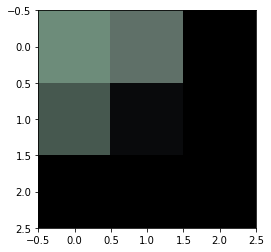

In [8]:
%matplotlib inline
plt.imshow(filters[...,0])

In [11]:
block1_conv1.input

<tf.Tensor 'input_1:0' shape=(None, None, None, 3) dtype=float32>

---

# feature map visualization

###  Building model - vgg first layer only

In [ ]:
import tensorflow as tf

In [8]:
vgg = tf.keras.applications.VGG16()
model = tf.keras.Model(inputs=vgg.inputs,
              outputs=vgg.layers[1].output)
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
Total params: 1,792
Trainable params: 1,792
Non-trainable params: 0
_________________________________________________________________


### load image

In [10]:
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing.image import img_to_array, load_img

<class 'PIL.JpegImagePlugin.JpegImageFile'>


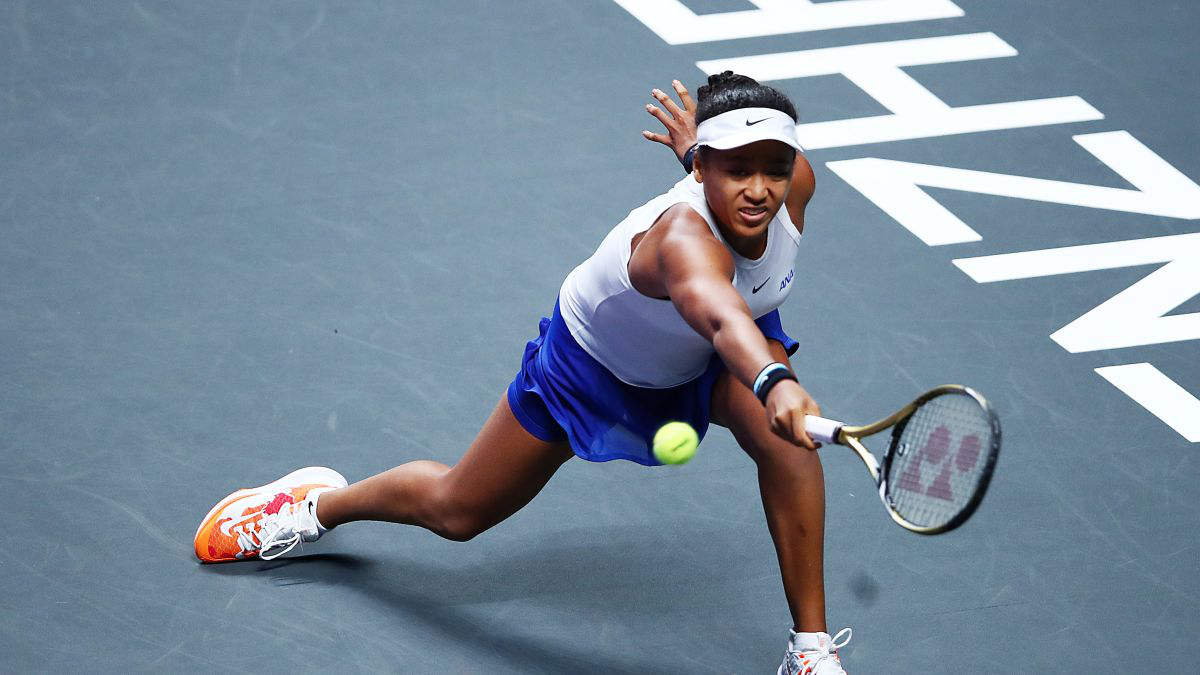

In [17]:
img_origin = load_img("practice/tennis.jpg")
print(type(img_origin))
img_origin

### image preprocessing

In [25]:
import numpy as np

In [ ]:
img = img_origin.resize((224,224))
img = img_to_array(img)
img = preprocess_input(img)
img = np.expand_dims(img, 0)

### feature map

In [39]:
feature_maps = model.predict(img)
print(feature_maps.shape)
feature_maps

(1, 224, 224, 64)


array([[[[ 0.        , 41.548847  ,  0.90528977, ...,  0.        ,
           3.5917325 ,  0.        ],
         [ 0.        , 60.33673   ,  1.3494633 , ...,  0.        ,
           8.6129465 ,  0.        ],
         [ 0.        , 60.835205  ,  4.3016105 , ...,  0.        ,
          17.892841  ,  2.1680298 ],
         ...,
         [12.8808775 , 61.492214  ,  0.        , ...,  7.5319405 ,
           0.        ,  0.        ],
         [14.478758  , 61.604496  ,  0.        , ...,  9.005949  ,
           0.        ,  0.        ],
         [ 0.        , 41.79538   ,  0.        , ...,  4.359599  ,
           0.        ,  0.        ]],

        [[ 0.        , 60.536594  ,  1.2118518 , ...,  0.        ,
           0.        ,  0.        ],
         [ 0.        , 87.5707    ,  3.2510006 , ...,  0.        ,
           0.        ,  0.        ],
         [ 0.        , 88.10016   ,  5.8845544 , ...,  0.        ,
           0.        ,  0.        ],
         ...,
         [ 0.        , 89.48564   

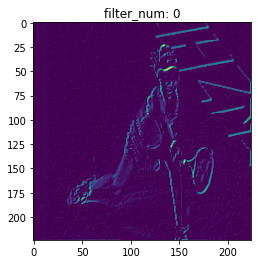

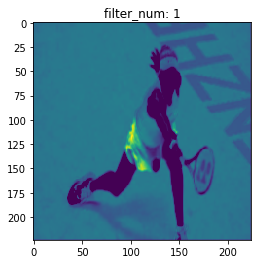

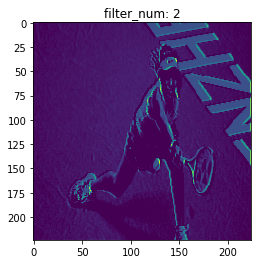

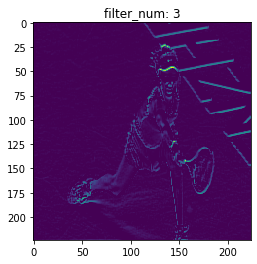

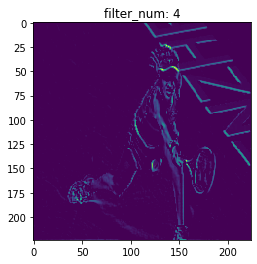

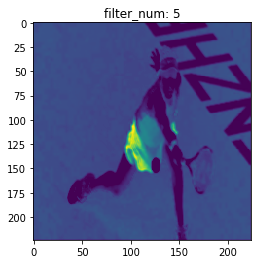

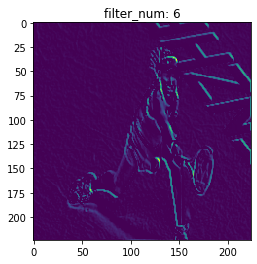

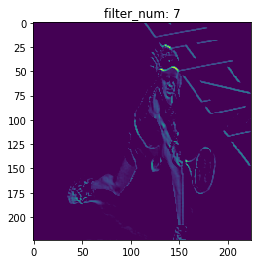

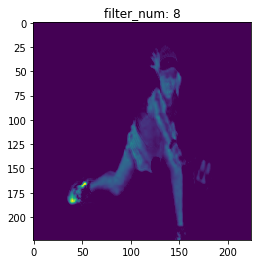

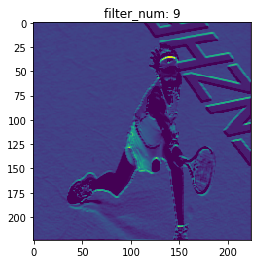

In [50]:
# featrue map visualization

i = 0
until = 10

for _ in feature_maps.squeeze().transpose(2,0,1):
    plt.imshow(_)
    plt.title(f"filter_num: {i}")
    plt.show()
    
    i += 1
    if i == until:
        break